In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Only normal data
data_normal = pd.read_csv("Final_Solar_Data/normal.csv")
data_normal.head()
data_normal.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,6330.000000,6330.000000,6330.000000,6330.000000,6330.0,6330.0,6330.0
mean,138.734933,9.739838,831.558621,1351.162537,0.0,0.0,0.0
std,1.809876,0.088144,1.902659,14.429356,0.0,0.0,0.0
min,132.175380,9.489920,825.585240,1291.955936,0.0,0.0,0.0
25%,137.572880,9.670472,830.585680,1342.380659,0.0,0.0,0.0
50%,138.774200,9.738865,831.730520,1351.460346,0.0,0.0,0.0
75%,139.927275,9.810010,832.698008,1360.264018,0.0,0.0,0.0
max,145.422990,10.024470,836.684810,1403.175089,0.0,0.0,0.0


In [3]:
# LL1
data_LL1 = pd.read_csv("Final_Solar_Data/LL1.csv")
data_LL1.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,136.94052,9.98591,844.63360,1367.475708,0,0,0
1,139.04534,9.95746,844.76560,1384.538411,0,0,0
2,138.92868,9.94529,844.78838,1381.686012,0,0,0
3,138.17504,9.97574,844.73537,1378.398274,0,0,0
4,137.07915,10.03791,844.57462,1375.988171,0,0,0


In [4]:
# LL2
data_LL2 = pd.read_csv("Final_Solar_Data/LL2.csv")
data_LL2.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,138.86004,10.15294,854.13382,1409.837655,0,0,0
1,135.23928,10.13656,854.20791,1370.861076,0,0,0
2,135.21717,10.11622,854.19620,1367.886639,0,0,0
3,136.81423,10.11374,853.97713,1383.703551,0,0,0
4,137.08330,10.14169,854.12744,1390.256333,0,0,0


In [5]:
# Str1_3-Str2_2-LL1
data_LL1_str = pd.read_csv("Final_Solar_Data/Str1_3-Str2_2-LL1.csv")
data_LL1_str.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,135.91478,10.54864,893.40683,1433.716085,0,0,0
1,135.63063,10.54657,893.54288,1430.437933,0,0,0
2,137.20148,10.55892,893.59781,1448.699451,0,0,0
3,138.06698,10.55964,893.53585,1457.937605,0,0,0
4,135.96772,10.54959,893.60419,1434.403699,0,0,0


In [11]:
# Partial Shading
data_partial = pd.read_csv("Final_Solar_Data/Partial_shading.csv")
data_partial.shape

(11680, 7)

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data to append all training data together and to test remaining data separately
train_normal, test_normal = train_test_split(data_normal, test_size=0.2)
train_LL1, test_LL1 = train_test_split(data_LL1, test_size=0.2)
train_LL2, test_LL2 = train_test_split(data_LL2, test_size=0.2)
train_LL1_str, test_LL1_str = train_test_split(data_LL1_str, test_size=0.2)
train_partial, test_partial = train_test_split(data_partial, test_size=0.2)

In [8]:
# Appending all training data
train_total = pd.concat([train_normal, train_LL1, train_LL2, train_LL1_str, train_partial], ignore_index=True)
train_total.describe()
# train_total.head()

,V,I,G,P,no_module_fault,fault,partial_shading
count,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000
mean,139.563405,9.174390,865.889833,1278.447849,0.449561,0.297254,0.102329
std,2.603791,1.209092,26.894247,155.830265,0.743022,0.457054,0.303083
min,128.633120,7.057530,825.585240,986.645824,0.000000,0.000000,0.000000
25%,137.740795,7.839692,841.570645,1122.731560,0.000000,0.000000,0.000000
50%,139.392705,9.768240,854.784675,1355.315883,0.000000,0.000000,0.000000
75%,141.280115,10.019143,895.996810,1393.188582,1.000000,1.000000,0.000000
max,150.465890,10.847240,904.615830,1515.478445,2.000000,1.000000,1.000000


In [9]:
# Appending all test data
test_total = pd.concat([test_normal, test_LL1, test_LL2, test_LL1_str, test_partial], ignore_index=True)
test_total.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000
mean,139.552589,9.183464,865.943559,1279.602268,0.450439,0.296924,0.098594
std,2.616870,1.211889,26.914402,156.155136,0.744730,0.456923,0.298129
min,129.085050,7.047240,825.748970,992.028671,0.000000,0.000000,0.000000
25%,137.764448,7.835870,841.583100,1123.377645,0.000000,0.000000,0.000000
50%,139.373925,9.769360,854.865360,1355.723761,0.000000,0.000000,0.000000
75%,141.250570,10.027452,896.060900,1395.233975,1.000000,1.000000,0.000000
max,150.549000,10.831940,904.551960,1500.906756,2.000000,1.000000,1.000000


<AxesSubplot:xlabel='V', ylabel='I'>

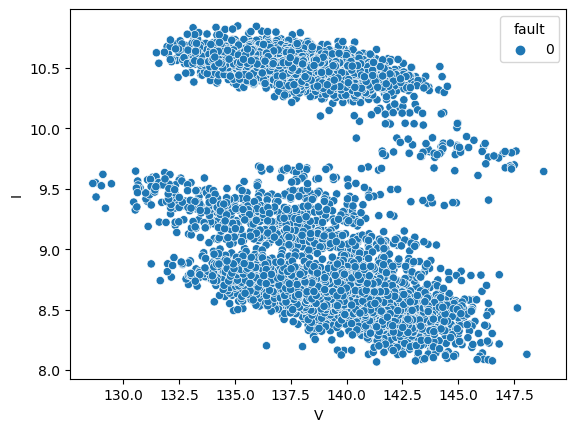

In [12]:
sns.scatterplot(x="V", y="I", hue="fault", data=data_partial)

<AxesSubplot:xlabel='V', ylabel='I'>

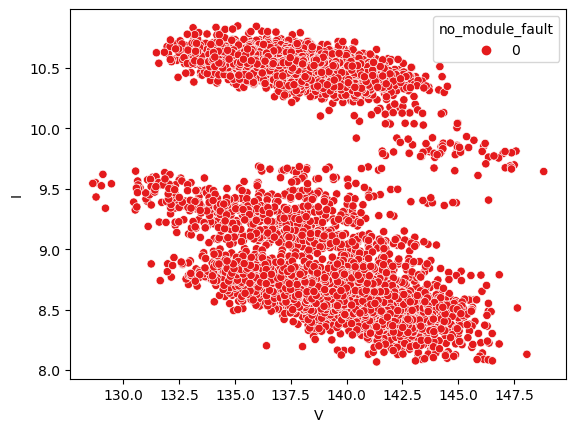

In [13]:
sns.scatterplot(x="V", y="I", hue="no_module_fault", data=data_partial, palette='Set1')

<AxesSubplot:xlabel='V', ylabel='I'>

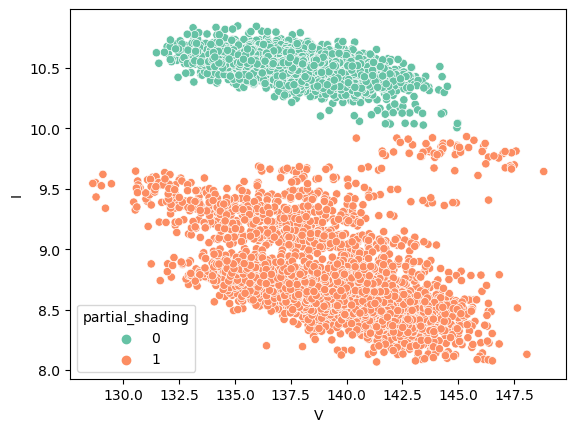

In [14]:
sns.scatterplot(x="V", y="I", hue="partial_shading", data=data_partial, palette="Set2")

<AxesSubplot:xlabel='P', ylabel='G'>

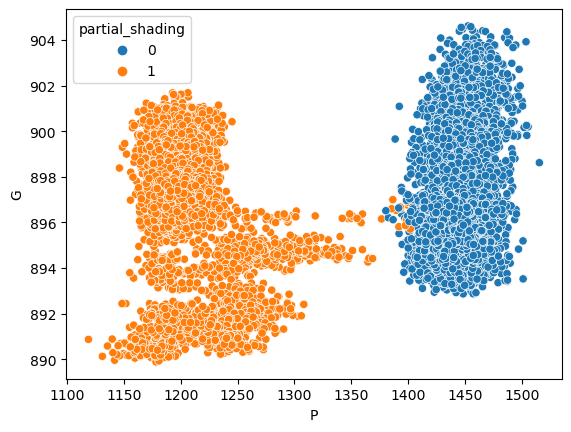

In [15]:
sns.scatterplot(x="P", y="G", hue="partial_shading", data=data_partial)

<AxesSubplot:xlabel='P', ylabel='G'>

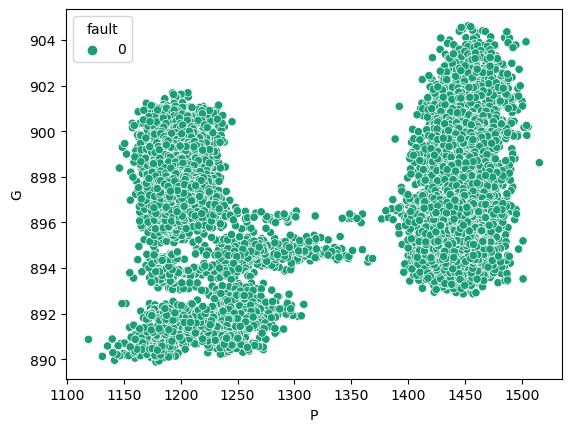

In [16]:
sns.scatterplot(x='P', y='G', hue='fault', data=data_partial, palette='Dark2')

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


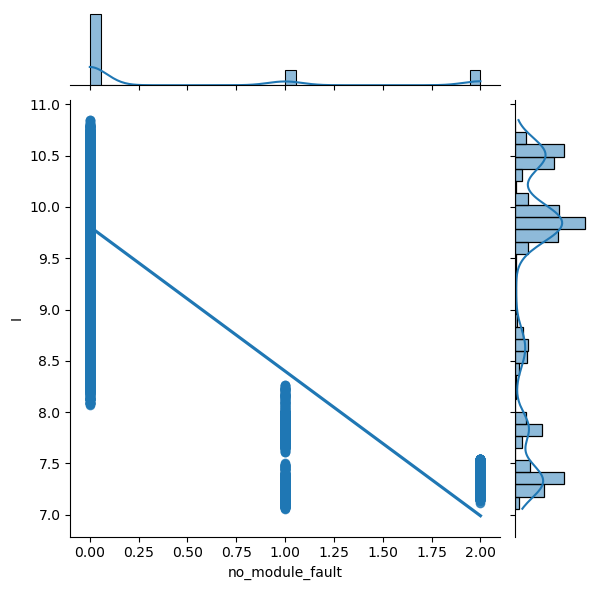

In [17]:
sns.jointplot("no_module_fault", "I", data=train_total, kind='reg');

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


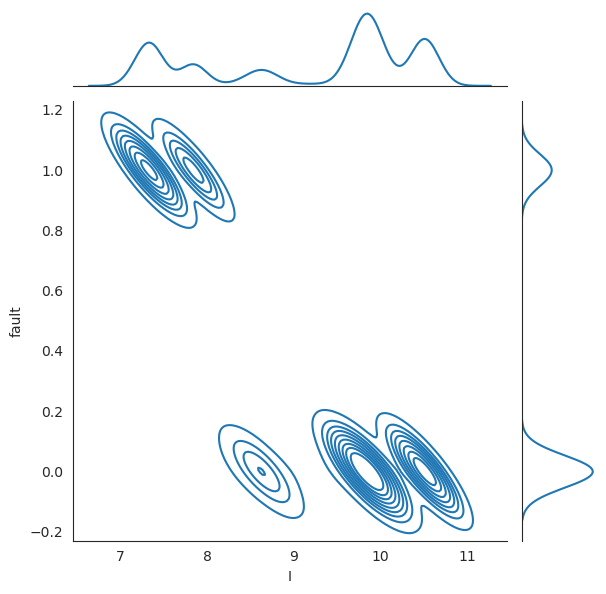

In [18]:
with sns.axes_style('white'):
    sns.jointplot("I", "fault", train_total, kind='kde');

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_shuffled = train_total.sample(frac=1)
train_shuffled_X = train_shuffled.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
train_shuffled_y = train_shuffled['fault']
train_shuffled_y_partial = train_shuffled['partial_shading']
train_shuffled_y_modules = train_shuffled['no_module_fault']
print(train_shuffled_X)
print(train_shuffled_y)

               V         I          G            P
16352  137.51028  10.02376  852.82340  1378.370044
16128  140.29525   9.76118  841.81091  1369.447188
41178  142.57348   8.30324  891.74043  1183.821822
31869  142.84133   7.83597  896.19694  1119.300377
28631  139.23909  10.54965  898.37134  1468.923666
...          ...       ...        ...          ...
25169  137.71769  10.06692  852.31562  1386.392968
25463  144.56407   7.21082  854.00991  1042.425487
7389   139.57005   9.81951  841.78068  1370.509502
24003  142.87428   7.27208  855.33311  1038.993194
45310  135.40282  10.73511  896.28424  1453.564167

[45520 rows x 4 columns]
16352    0
16128    0
41178    0
31869    1
28631    0
        ..
25169    0
25463    1
7389     0
24003    1
45310    0
Name: fault, Length: 45520, dtype: int64


In [20]:
test_total_X = test_total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
test_total_y = test_total['fault']
test_total_y_partial = test_total['partial_shading']
test_total_y_modules = test_total['no_module_fault']
print(test_total_X)
print(test_total_y)

               V         I          G            P
0      137.20275   9.90064  834.58216  1358.395035
1      141.36877   9.62209  833.36648  1360.263028
2      139.77646   9.71793  834.36095  1358.337854
3      139.37291   9.66289  831.01473  1346.745098
4      138.10413   9.74798  830.53591  1346.236297
...          ...       ...        ...          ...
11375  140.59665   8.58395  900.20508  1206.874614
11376  137.77134   8.70040  897.25125  1198.665767
11377  136.36544  10.51992  901.43291  1434.553520
11378  135.64748   8.74584  897.45053  1186.351156
11379  140.59473  10.41119  898.44862  1463.758447

[11380 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
11375    0
11376    0
11377    0
11378    0
11379    0
Name: fault, Length: 11380, dtype: int64


## General classification models

In [21]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(train_shuffled_X, train_shuffled_y)

GaussianNB()

In [22]:
predict_GNB = model_GNB.predict(test_total_X)
acc_GNB = accuracy_score(test_total_y, predict_GNB)
print("Accuracy:", acc_GNB*100, "%")

Accuracy: 99.84182776801406 %


In [23]:
model_GNB_partial = GaussianNB()
model_GNB_partial.fit(train_shuffled_X, train_shuffled_y_partial)

GaussianNB()

In [24]:
predict_GNB_partial = model_GNB_partial.predict(test_total_X)
acc_GNB_partial = accuracy_score(test_total_y_partial, predict_GNB_partial)
print("Accuracy:", acc_GNB_partial*100, "%")

Accuracy: 98.9543057996485 %


In [25]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(train_shuffled_X, train_shuffled_y)

LogisticRegression()

In [26]:
predict_LogReg = model_LogReg.predict(test_total_X)
acc_LogReg = accuracy_score(test_total_y, predict_LogReg)
print("Accuracy:", acc_LogReg*100, "%")

Accuracy: 99.99121265377856 %


In [27]:
model_LogReg_partial = LogisticRegression()
model_LogReg_partial.fit(train_shuffled_X, train_shuffled_y_partial)

LogisticRegression()

In [28]:
predict_LogReg_partial = model_LogReg_partial.predict(test_total_X)
acc_LogReg_partial = accuracy_score(test_total_y_partial, predict_LogReg_partial)
print("Accuracy:", acc_LogReg_partial*100, "%" )

Accuracy: 94.43760984182776 %


In [29]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(train_shuffled_X, train_shuffled_y)

DecisionTreeClassifier()

In [30]:
predict_DT = model_DT.predict(test_total_X)
acc_DT = accuracy_score(test_total_y, predict_DT)
print("Accuracy:", acc_DT*100, "%")
print("Precision:", precision_score(test_total_y, predict_DT)*100, "%")
print("Recall:", recall_score(test_total_y, predict_DT)*100, "%")
print("F1:", f1_score(test_total_y, predict_DT)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 99.97040544539804 %
Recall: 99.97040544539804 %
F1: 99.97040544539804 %


[Text(0.6363636363636364, 0.9166666666666666, 'X[3] <= 1158.064\ngini = 0.418\nsamples = 45520\nvalue = [31989, 13531]'),
 Text(0.45454545454545453, 0.75, 'X[1] <= 8.273\ngini = 0.004\nsamples = 13550\nvalue = [26, 13524]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[1] <= 8.124\ngini = 0.002\nsamples = 13536\nvalue = [12, 13524]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[1] <= 8.065\ngini = 0.0\nsamples = 13486\nvalue = [1, 13485]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 13470\nvalue = [0, 13470]'),
 Text(0.2727272727272727, 0.25, 'X[1] <= 8.067\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[2] <= 893.69\ngini = 0.343\nsamples = 50\nvalue = [11, 39]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 11\nvalue =

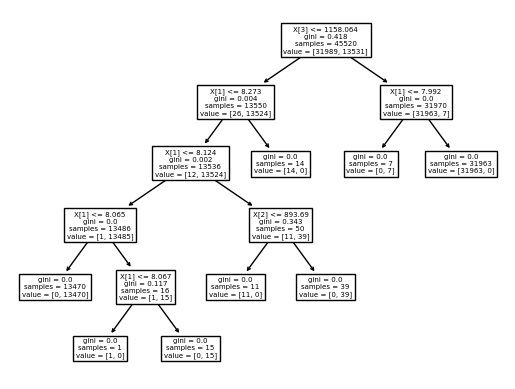

In [31]:
from sklearn import tree
tree.plot_tree(model_DT)

# import graphviz
# dot_data = tree.export_graphviz(model_DT, out_file=None)
# graph = graphviz.Source(dot_data) 
# graph.render("solar") 

In [32]:
model_DT_partial = DecisionTreeClassifier()
model_DT_partial.fit(train_shuffled_X, train_shuffled_y_partial)

DecisionTreeClassifier()

In [33]:
predict_DT_partial = model_DT_partial.predict(test_total_X)
acc_DT_partial = accuracy_score(test_total_y_partial, predict_DT_partial)
print("Accuracy:", acc_DT_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_DT_partial)*100, "%")

Accuracy: 99.94727592267135 %
Precision: 99.82142857142857 %
Recall: 99.64349376114082 %
F1: 99.73238180196255 %


[Text(0.47519267822736033, 0.9615384615384616, 'X[1] <= 9.561\ngini = 0.184\nsamples = 45520\nvalue = [40862, 4658]'),
 Text(0.21579961464354527, 0.8846153846153846, 'X[3] <= 1158.064\ngini = 0.376\nsamples = 18217\nvalue = [13639, 4578]'),
 Text(0.15414258188824662, 0.8076923076923077, 'X[1] <= 8.273\ngini = 0.004\nsamples = 13550\nvalue = [13524, 26]'),
 Text(0.1233140655105973, 0.7307692307692307, 'X[1] <= 8.124\ngini = 0.002\nsamples = 13536\nvalue = [13524, 12]'),
 Text(0.06165703275529865, 0.6538461538461539, 'X[1] <= 8.065\ngini = 0.0\nsamples = 13486\nvalue = [13485, 1]'),
 Text(0.030828516377649325, 0.5769230769230769, 'gini = 0.0\nsamples = 13470\nvalue = [13470, 0]'),
 Text(0.09248554913294797, 0.5769230769230769, 'X[1] <= 8.067\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.06165703275529865, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1233140655105973, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.18497109826589594, 0.6538461538461539, 'X

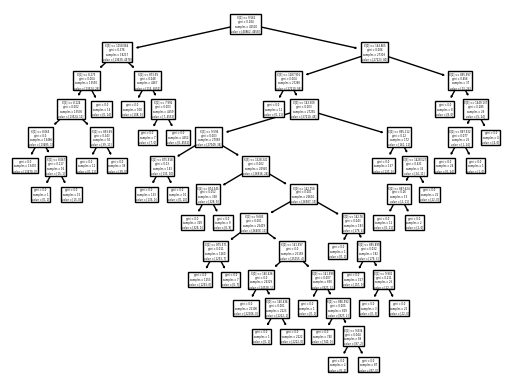

In [34]:
tree.plot_tree(model_DT_partial)

In [35]:
model_DT_modules = DecisionTreeClassifier()
model_DT_modules.fit(train_shuffled_X, train_shuffled_y_modules)

DecisionTreeClassifier()

In [36]:
predict_DT_modules = model_DT_modules.predict(test_total_X)
print("Accuracy:", accuracy_score(test_total_y_modules, predict_DT_modules)*100, "%")

Accuracy: 99.75395430579965 %


[Text(0.846185064935065, 0.9705882352941176, 'X[3] <= 1158.064\ngini = 0.462\nsamples = 45520\nvalue = [31989, 6598, 6933]'),
 Text(0.7301136363636364, 0.9117647058823529, 'X[2] <= 892.497\ngini = 0.502\nsamples = 13550\nvalue = [26, 6591, 6933]'),
 Text(0.5369318181818182, 0.8529411764705882, 'X[2] <= 841.839\ngini = 0.373\nsamples = 9210\nvalue = [20, 2257, 6933]'),
 Text(0.18952922077922077, 0.7941176470588235, 'X[2] <= 841.366\ngini = 0.071\nsamples = 2271\nvalue = [0, 2187, 84]'),
 Text(0.06493506493506493, 0.7352941176470589, 'X[2] <= 841.318\ngini = 0.005\nsamples = 2051\nvalue = [0, 2046, 5]'),
 Text(0.025974025974025976, 0.6764705882352942, 'X[2] <= 841.274\ngini = 0.001\nsamples = 2028\nvalue = [0, 2027, 1]'),
 Text(0.012987012987012988, 0.6176470588235294, 'gini = 0.0\nsamples = 2013\nvalue = [0, 2013, 0]'),
 Text(0.03896103896103896, 0.6176470588235294, 'X[2] <= 841.279\ngini = 0.124\nsamples = 15\nvalue = [0, 14, 1]'),
 Text(0.025974025974025976, 0.5588235294117647, 'gini 

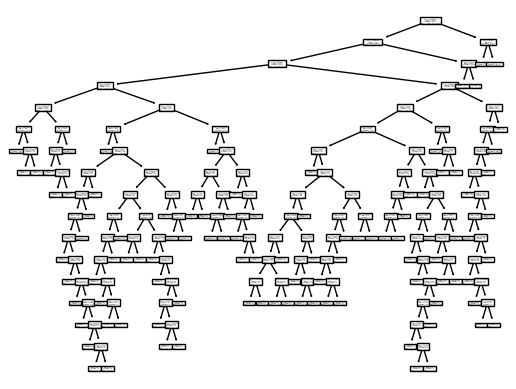

In [37]:
tree.plot_tree(model_DT_modules)

## Ensemble methods

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(train_shuffled_X, train_shuffled_y)

RandomForestClassifier()

In [39]:
predict_RF = model_RF.predict(test_total_X)
acc_RF = accuracy_score(test_total_y, predict_RF)
print("Accuracy:", acc_RF*100, "%")
print("Precision:", precision_score(test_total_y, predict_RF)*100, "%")
print("Recall:", recall_score(test_total_y, predict_RF)*100, "%")
print("F1:", f1_score(test_total_y, predict_RF)*100, "%")

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1: 100.0 %


In [40]:
model_RF_partial = RandomForestClassifier()
model_RF_partial.fit(train_shuffled_X, train_shuffled_y_partial)

RandomForestClassifier()

In [41]:
predict_RF_partial = model_RF_partial.predict(test_total_X)
acc_RF_partial = accuracy_score(test_total_y_partial, predict_RF_partial)
print("Accuracy:", acc_RF_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_RF_partial)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 100.0 %
Recall: 99.8217468805704 %
F1: 99.91079393398752 %


In [42]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GBM = GradientBoostingClassifier(n_estimators=109)
model_GBM.fit(train_shuffled_X, train_shuffled_y)

GradientBoostingClassifier(n_estimators=109)

In [43]:
# for n_estimators=100 (default)
predict_GBM = model_GBM.predict(test_total_X)
# acc_GBM = accuracy_score(test_total_y, predict_GBM)
print("Accuracy:", acc_GBM*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

NameError: name 'acc_GBM' is not defined

In [ ]:
# for n_estimators=120
predict_GBM = model_GBM.predict(test_total_X)
print("Accuracy:", accuracy_score(test_total_y, predict_GBM)*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

In [ ]:
# for n_estimators=109
predict_GBM = model_GBM.predict(test_total_X)
acc_GBM = accuracy_score(test_total_y, predict_GBM)
print("Accuracy:", accuracy_score(test_total_y, predict_GBM)*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
# KF = KFold(10, True)
SSS = StratifiedKFold(n_splits=10)

In [ ]:
total = pd.concat([train_total, test_total], ignore_index=True)
total_X = total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
total_y = total['fault']
total_y_partial = total['partial_shading']
total_y_modules = total['no_module_fault']
total_X.describe()

In [ ]:
# Naive Bayes
model_GNB_crossval = GaussianNB()
predict_GNB_crossval = cross_val_score(model_GNB_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GNB = predict_GNB_crossval.mean()
print("Cross validated accuracies:", predict_GNB_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GNB*100, "%")

In [ ]:
# Logistic Regression
model_LogReg_crossval = LogisticRegression()
predict_LogReg_crossval = cross_val_score(model_LogReg_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_LogReg = predict_LogReg_crossval.mean()
print("Cross validated accuracies:", predict_LogReg_crossval)
print("Average cross validated accuracy:", avg_crossval_score_LogReg*100, "%")

In [ ]:
# Decision Trees
model_DT_crossval = DecisionTreeClassifier()
predict_DT_crossval = cross_val_score(model_DT_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_DT = predict_DT_crossval.mean()
print("Cross validated accuracies:", predict_DT_crossval)
print("Average cross validated accuracy:", avg_crossval_score_DT*100, "%")

In [ ]:
# Random Forest
model_RF_crossval = RandomForestClassifier()
predict_RF_crossval = cross_val_score(model_RF_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_RF = predict_RF_crossval.mean()
print("Cross validated accuracies:", predict_RF_crossval)
print("Average cross validated accuracy:", avg_crossval_score_RF*100, "%")

In [ ]:
# Gradient Boosting Machine
model_GBM_crossval = GradientBoostingClassifier()
predict_GBM_crossval = cross_val_score(model_GBM_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GBM = predict_GBM_crossval.mean()
print("Cross validated accuracies:", predict_GBM_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GBM*100, "%")

In [ ]:
# Gradient Boosting Machine with n_estimators=109
model_GBM_crossval = GradientBoostingClassifier(n_estimators=109)
predict_GBM_crossval = cross_val_score(model_GBM_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GBM = predict_GBM_crossval.mean()
print("Cross validated accuracies:", predict_GBM_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GBM*100, "%")

## Finding the best algorithm

In [ ]:
AccList = [['Naive Bayes', acc_GNB*100],
           ['Logistic Regression', acc_LogReg*100],
           ['Decision Tree', acc_DT*100],
           ['Random Forest', acc_RF*100],
           ['Gradient Boosting Classifier', acc_GBM*100]
          ]

acc_results = pd.DataFrame(AccList, columns = ['Classification Model', 'Accuracy Score (%)'])
acc_results.sort_values(by=["Accuracy Score (%)"], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()

In [ ]:
# For cross-validated scores
AccList_Crossval = [['Naive Bayes', avg_crossval_score_GNB*100],
           ['Logistic Regression', avg_crossval_score_LogReg*100],
           ['Decision Tree', avg_crossval_score_DT*100],
           ['Random Forest', avg_crossval_score_RF*100],
           ['Gradient Boosting Classifier', avg_crossval_score_GBM*100]
          ]

acc_results = pd.DataFrame(AccList_Crossval, columns = ['Classification Model', 'Accuracy Score (%)'])
acc_results.sort_values(by=['Accuracy Score (%)'], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()